In [2]:
import pandas as pd
import os

user_home = os.path.expanduser("~")
root_path = os.path.dirname(user_home)
print(root_path)

# dataset_pt1 = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/DragonY/LogTrain1.csv")
# dataset_pt2 = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/DragonY/LogTrain2.csv")
# dataset_pt3 = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/DragonY/LogTrain3.csv")
# y1 = dataset_pt1['MoleFraction']
# y2 = dataset_pt2['MoleFraction']
# y3 = dataset_pt3['MoleFraction']
# X1 = dataset_pt1.iloc[:, 7:]
# X2 = dataset_pt2.iloc[:, 7:]
# X3 = dataset_pt3.iloc[:, 7:]

# y = pd.concat([y1, y2, y3], axis=0).reset_index(drop=True)
# X = pd.concat([X1, X2, X3], axis=0).reset_index(drop=True)


# Without Dragon
dataset_pt = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/ThreeMF/NoDragon/LogTrain.csv")
y = dataset_pt['MoleFraction']
X = dataset_pt.iloc[:, 7:]


# to_remove = ["MW", "AMW", "Sv", "NumHAcceptors", "NumHeteroatoms", "NumRotatableBonds", 
#              "RingCount", "RotatableBondCount", "FeatureCount3D", "EffectiveRotorCount3D",
#              "BCUT2D_MWLOW", "PEOE_VSA1", "PEOE_VSA6", "PEOE_VSA7", "PEOE_VSA8",
#              "SMR_VSA1", "SMR_VSA10", "SMR_VSA5", "SlogP_VSA2", "SlogP_VSA3", "SlogP_VSA5",
#              "EState_VSA4", "EState_VSA5", "EState_VSA8", "EState_VSA9", "VSA_EState3", 
#              "VSA_EState5", "VSA_EState7", "VSA,
# EState8", "FractionCSP3", "NOCount"]
# X = X.drop(columns=to_remove)

X_weighted = X
X.describe()

C:\Users


,Temperature,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,RotatableBondCount,HeavyAtomCount,Volume3D,...,NOCount,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,RingCount,MolLogP,MolMR,MW,AMW,Sv
count,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,...,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000,13875.000000
mean,0.053338,-0.029567,-0.015852,-0.022886,-0.031751,-0.040463,-0.016995,0.005132,-0.039758,-0.041488,...,-0.023607,-0.028131,-0.013750,0.002358,-0.013195,-0.017857,-0.035144,-0.026430,0.001787,-0.030348
std,0.950071,0.996415,0.983365,1.007243,1.009754,1.011383,1.009831,1.045338,1.002196,1.007740,...,0.986010,0.983064,0.985074,1.032864,0.930206,0.977698,0.994342,1.006453,1.022654,1.000277
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-3.439321,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.451469,-0.691543,-0.661162,-0.676699,-0.713530,-0.721714,-0.715218,-0.577557,-0.702315,-0.707140,...,-0.407442,-0.596935,-0.592444,-0.570161,-0.526417,-0.667702,-0.695908,-0.693798,-0.687939,-0.687939
50%,-0.451469,-0.038608,-0.038901,-0.028971,-0.036493,-0.043924,-0.018820,-0.007527,0.005018,-0.060435,...,0.185480,0.011291,-0.036391,0.020074,-0.526417,-0.023992,-0.051460,-0.031181,-0.006273,-0.043704
75%,0.717032,0.636444,0.662724,0.648607,0.642511,0.639462,0.665852,0.573115,0.654930,0.635019,...,0.587964,0.457033,0.664287,0.616541,0.855287,0.632227,0.613923,0.636247,0.688041,0.642782
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,...,5.199338,5.199338,3.587654,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,3.423395


In [2]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from tqdm import tqdm

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds
np.random.seed(random.randint(0, 1000))
torch.manual_seed(random.randint(0, 1000))
if torch.cuda.is_available():
    print("\ncuda is available\n")
    torch.cuda.manual_seed_all(random.randint(0, 1000))

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0, 1000))

component_range = range(1, (X_weighted.shape[1] + 1), 1)

avg_rmse_list = []
max_rmse_list = []
min_rmse_list = []
avg_r2_list = []
max_r2_list = []
min_r2_list = []
components = []
true_values_all = []; predicted_values_all = []

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        return self.layers(x)

trained_models = {}
trained_pcas = {}
for n_components in component_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_weighted)
    trained_pcas[n_components] = pca
    
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in tqdm(kf.split(X_pca), total=kf.get_n_splits(), desc=f"KFold iteration for {n_components} PCA components with Neural Network"):
        # Convert data to PyTorch tensors and move to device
        X_train, X_test = torch.tensor(X_pca[train_index]).float().to(device), torch.tensor(X_pca[test_index]).float().to(device)
        y_train, y_test = torch.tensor(y.iloc[train_index].values).float().to(device), torch.tensor(y.iloc[test_index].values).float().to(device)

        model = NeuralNetwork(input_dim=n_components).to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters())

        trained_models[n_components] = model.state_dict()

        best_loss = float('inf')
        patience = 500
        no_improve_epochs = 0

        for epoch in range(150):
            # Training
            optimizer.zero_grad()
            outputs = model(X_train).squeeze()
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()

            # Checking if training loss improved
            if loss.item() < best_loss - 1e-5:  # Using a small constant of 1e-5 to determine improvement
                best_loss = loss.item()
                no_improve_epochs = 0
            else:
                no_improve_epochs += 1

            # Check for early stopping
            if no_improve_epochs >= patience:
                print(f"Stopped early at epoch {epoch}")
                break

        y_pred = model(X_test).cpu().detach().numpy()
        y_test_cpu = y_test.cpu().numpy()

        rmse = np.sqrt(mean_squared_error(y_test_cpu, y_pred))
        rmse_scores.append(rmse)

        r2 = r2_score(y_test_cpu, y_pred)
        r2_scores.append(r2)

        true_values_all.append(y_test.cpu().numpy())
        predicted_values_all.append(y_pred)

    avg_rmse = np.mean(rmse_scores)
    max_rmse = np.max(rmse_scores)
    min_rmse = np.min(rmse_scores)
    avg_r2 = np.mean(r2_scores)
    max_r2 = np.max(r2_scores)
    min_r2 = np.min(r2_scores)

    print(f"Number of PCA Components: {n_components}")
    print(f"Average RMSE over {kf.get_n_splits()} folds with Neural Network: {avg_rmse}")
    print(f"Average R^2 score over {kf.get_n_splits()} folds with Neural Network: {avg_r2}")
    print("-" * 50)

    avg_rmse_list.append(avg_rmse)
    max_rmse_list.append(max_rmse)
    min_rmse_list.append(min_rmse)
    avg_r2_list.append(avg_r2)
    max_r2_list.append(max_r2)
    min_r2_list.append(min_r2)

    components.append(n_components)


cuda is available



KFold iteration for 1 PCA components with Neural Network: 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]


Number of PCA Components: 1
Average RMSE over 5 folds with Neural Network: 2.607374906539917
Average R^2 score over 5 folds with Neural Network: 0.04136772278056482
--------------------------------------------------


KFold iteration for 2 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Number of PCA Components: 2
Average RMSE over 5 folds with Neural Network: 2.345029830932617
Average R^2 score over 5 folds with Neural Network: 0.22449416675654765
--------------------------------------------------


KFold iteration for 3 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Number of PCA Components: 3
Average RMSE over 5 folds with Neural Network: 2.1254096031188965
Average R^2 score over 5 folds with Neural Network: 0.36185295690309954
--------------------------------------------------


KFold iteration for 4 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Number of PCA Components: 4
Average RMSE over 5 folds with Neural Network: 2.1094164848327637
Average R^2 score over 5 folds with Neural Network: 0.37254544546975055
--------------------------------------------------


KFold iteration for 5 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Number of PCA Components: 5
Average RMSE over 5 folds with Neural Network: 2.1126251220703125
Average R^2 score over 5 folds with Neural Network: 0.3704973849347132
--------------------------------------------------


KFold iteration for 6 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Number of PCA Components: 6
Average RMSE over 5 folds with Neural Network: 2.087104082107544
Average R^2 score over 5 folds with Neural Network: 0.3855092058049294
--------------------------------------------------


KFold iteration for 7 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Number of PCA Components: 7
Average RMSE over 5 folds with Neural Network: 1.943568229675293
Average R^2 score over 5 folds with Neural Network: 0.4658972133961347
--------------------------------------------------


KFold iteration for 8 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Number of PCA Components: 8
Average RMSE over 5 folds with Neural Network: 1.923110008239746
Average R^2 score over 5 folds with Neural Network: 0.4763747812197662
--------------------------------------------------


KFold iteration for 9 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Number of PCA Components: 9
Average RMSE over 5 folds with Neural Network: 1.9138429164886475
Average R^2 score over 5 folds with Neural Network: 0.4818141875855342
--------------------------------------------------


KFold iteration for 10 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Number of PCA Components: 10
Average RMSE over 5 folds with Neural Network: 1.9433456659317017
Average R^2 score over 5 folds with Neural Network: 0.4656455251910484
--------------------------------------------------


KFold iteration for 11 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Number of PCA Components: 11
Average RMSE over 5 folds with Neural Network: 1.9329938888549805
Average R^2 score over 5 folds with Neural Network: 0.4717570158869571
--------------------------------------------------


KFold iteration for 12 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Number of PCA Components: 12
Average RMSE over 5 folds with Neural Network: 1.9192947149276733
Average R^2 score over 5 folds with Neural Network: 0.4782684924652081
--------------------------------------------------


KFold iteration for 13 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Number of PCA Components: 13
Average RMSE over 5 folds with Neural Network: 1.9138822555541992
Average R^2 score over 5 folds with Neural Network: 0.48300467715417683
--------------------------------------------------


KFold iteration for 14 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Number of PCA Components: 14
Average RMSE over 5 folds with Neural Network: 1.8860746622085571
Average R^2 score over 5 folds with Neural Network: 0.49665818176587384
--------------------------------------------------


KFold iteration for 15 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Number of PCA Components: 15
Average RMSE over 5 folds with Neural Network: 1.8696889877319336
Average R^2 score over 5 folds with Neural Network: 0.5044701369607308
--------------------------------------------------


KFold iteration for 16 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Number of PCA Components: 16
Average RMSE over 5 folds with Neural Network: 1.8703696727752686
Average R^2 score over 5 folds with Neural Network: 0.505216005068972
--------------------------------------------------


KFold iteration for 17 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Number of PCA Components: 17
Average RMSE over 5 folds with Neural Network: 1.8568248748779297
Average R^2 score over 5 folds with Neural Network: 0.5117413652578418
--------------------------------------------------


KFold iteration for 18 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Number of PCA Components: 18
Average RMSE over 5 folds with Neural Network: 1.8222424983978271
Average R^2 score over 5 folds with Neural Network: 0.5304814367969173
--------------------------------------------------


KFold iteration for 19 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Number of PCA Components: 19
Average RMSE over 5 folds with Neural Network: 1.7664082050323486
Average R^2 score over 5 folds with Neural Network: 0.557868252489858
--------------------------------------------------


KFold iteration for 20 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Number of PCA Components: 20
Average RMSE over 5 folds with Neural Network: 1.7674236297607422
Average R^2 score over 5 folds with Neural Network: 0.5577908545177049
--------------------------------------------------


KFold iteration for 21 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Number of PCA Components: 21
Average RMSE over 5 folds with Neural Network: 1.7641685009002686
Average R^2 score over 5 folds with Neural Network: 0.5594074377441874
--------------------------------------------------


KFold iteration for 22 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Number of PCA Components: 22
Average RMSE over 5 folds with Neural Network: 1.7792232036590576
Average R^2 score over 5 folds with Neural Network: 0.5500711654435249
--------------------------------------------------


KFold iteration for 23 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Number of PCA Components: 23
Average RMSE over 5 folds with Neural Network: 1.775133490562439
Average R^2 score over 5 folds with Neural Network: 0.5513930843788479
--------------------------------------------------


KFold iteration for 24 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Number of PCA Components: 24
Average RMSE over 5 folds with Neural Network: 1.798903226852417
Average R^2 score over 5 folds with Neural Network: 0.5369144244506933
--------------------------------------------------


KFold iteration for 25 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Number of PCA Components: 25
Average RMSE over 5 folds with Neural Network: 1.7216808795928955
Average R^2 score over 5 folds with Neural Network: 0.5787549402094058
--------------------------------------------------


KFold iteration for 26 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Number of PCA Components: 26
Average RMSE over 5 folds with Neural Network: 1.703688621520996
Average R^2 score over 5 folds with Neural Network: 0.5884852276927411
--------------------------------------------------


KFold iteration for 27 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Number of PCA Components: 27
Average RMSE over 5 folds with Neural Network: 1.704789400100708
Average R^2 score over 5 folds with Neural Network: 0.5877103282794438
--------------------------------------------------


KFold iteration for 28 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Number of PCA Components: 28
Average RMSE over 5 folds with Neural Network: 1.700722336769104
Average R^2 score over 5 folds with Neural Network: 0.5892317861454969
--------------------------------------------------


KFold iteration for 29 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Number of PCA Components: 29
Average RMSE over 5 folds with Neural Network: 1.704463243484497
Average R^2 score over 5 folds with Neural Network: 0.5878648362263738
--------------------------------------------------


KFold iteration for 30 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Number of PCA Components: 30
Average RMSE over 5 folds with Neural Network: 1.694543480873108
Average R^2 score over 5 folds with Neural Network: 0.5924397828510566
--------------------------------------------------


KFold iteration for 31 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Number of PCA Components: 31
Average RMSE over 5 folds with Neural Network: 1.6923742294311523
Average R^2 score over 5 folds with Neural Network: 0.5933581596520243
--------------------------------------------------


KFold iteration for 32 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Number of PCA Components: 32
Average RMSE over 5 folds with Neural Network: 1.704689621925354
Average R^2 score over 5 folds with Neural Network: 0.5874292299685329
--------------------------------------------------


KFold iteration for 33 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Number of PCA Components: 33
Average RMSE over 5 folds with Neural Network: 1.706315279006958
Average R^2 score over 5 folds with Neural Network: 0.5860378302771896
--------------------------------------------------


KFold iteration for 34 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Number of PCA Components: 34
Average RMSE over 5 folds with Neural Network: 1.7036335468292236
Average R^2 score over 5 folds with Neural Network: 0.5880181687057977
--------------------------------------------------


KFold iteration for 35 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Number of PCA Components: 35
Average RMSE over 5 folds with Neural Network: 1.684835433959961
Average R^2 score over 5 folds with Neural Network: 0.5976898139065817
--------------------------------------------------


KFold iteration for 36 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Number of PCA Components: 36
Average RMSE over 5 folds with Neural Network: 1.713222861289978
Average R^2 score over 5 folds with Neural Network: 0.5812908950953534
--------------------------------------------------


KFold iteration for 37 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Number of PCA Components: 37
Average RMSE over 5 folds with Neural Network: 1.6975791454315186
Average R^2 score over 5 folds with Neural Network: 0.5908964521734884
--------------------------------------------------


KFold iteration for 38 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Number of PCA Components: 38
Average RMSE over 5 folds with Neural Network: 1.6841121912002563
Average R^2 score over 5 folds with Neural Network: 0.5974553223075338
--------------------------------------------------


KFold iteration for 39 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Number of PCA Components: 39
Average RMSE over 5 folds with Neural Network: 1.6975829601287842
Average R^2 score over 5 folds with Neural Network: 0.590254712053406
--------------------------------------------------


KFold iteration for 40 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Number of PCA Components: 40
Average RMSE over 5 folds with Neural Network: 1.7112442255020142
Average R^2 score over 5 folds with Neural Network: 0.5838891651458824
--------------------------------------------------


KFold iteration for 41 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Number of PCA Components: 41
Average RMSE over 5 folds with Neural Network: 1.6907129287719727
Average R^2 score over 5 folds with Neural Network: 0.5934648887430066
--------------------------------------------------


KFold iteration for 42 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Number of PCA Components: 42
Average RMSE over 5 folds with Neural Network: 1.71942937374115
Average R^2 score over 5 folds with Neural Network: 0.5781633257575771
--------------------------------------------------


KFold iteration for 43 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Number of PCA Components: 43
Average RMSE over 5 folds with Neural Network: 1.7111446857452393
Average R^2 score over 5 folds with Neural Network: 0.5843748815023604
--------------------------------------------------


KFold iteration for 44 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Number of PCA Components: 44
Average RMSE over 5 folds with Neural Network: 1.7007629871368408
Average R^2 score over 5 folds with Neural Network: 0.588913442933657
--------------------------------------------------


KFold iteration for 45 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Number of PCA Components: 45
Average RMSE over 5 folds with Neural Network: 1.6922801733016968
Average R^2 score over 5 folds with Neural Network: 0.5917000881919956
--------------------------------------------------


KFold iteration for 46 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Number of PCA Components: 46
Average RMSE over 5 folds with Neural Network: 1.678741693496704
Average R^2 score over 5 folds with Neural Network: 0.5994104032873373
--------------------------------------------------


KFold iteration for 47 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Number of PCA Components: 47
Average RMSE over 5 folds with Neural Network: 1.6631298065185547
Average R^2 score over 5 folds with Neural Network: 0.6075890772236309
--------------------------------------------------


KFold iteration for 48 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Number of PCA Components: 48
Average RMSE over 5 folds with Neural Network: 1.67951238155365
Average R^2 score over 5 folds with Neural Network: 0.5984566372625546
--------------------------------------------------


KFold iteration for 49 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Number of PCA Components: 49
Average RMSE over 5 folds with Neural Network: 1.6804492473602295
Average R^2 score over 5 folds with Neural Network: 0.5979292745635737
--------------------------------------------------


KFold iteration for 50 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Number of PCA Components: 50
Average RMSE over 5 folds with Neural Network: 1.6799087524414062
Average R^2 score over 5 folds with Neural Network: 0.5981760658700697
--------------------------------------------------


KFold iteration for 51 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Number of PCA Components: 51
Average RMSE over 5 folds with Neural Network: 1.6665891408920288
Average R^2 score over 5 folds with Neural Network: 0.6050871132995911
--------------------------------------------------


KFold iteration for 52 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Number of PCA Components: 52
Average RMSE over 5 folds with Neural Network: 1.6852611303329468
Average R^2 score over 5 folds with Neural Network: 0.5967050417329425
--------------------------------------------------


KFold iteration for 53 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Number of PCA Components: 53
Average RMSE over 5 folds with Neural Network: 1.6728780269622803
Average R^2 score over 5 folds with Neural Network: 0.6025865820722738
--------------------------------------------------


KFold iteration for 54 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Number of PCA Components: 54
Average RMSE over 5 folds with Neural Network: 1.6851832866668701
Average R^2 score over 5 folds with Neural Network: 0.5959389054643158
--------------------------------------------------


KFold iteration for 55 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Number of PCA Components: 55
Average RMSE over 5 folds with Neural Network: 1.6648038625717163
Average R^2 score over 5 folds with Neural Network: 0.6049303664926721
--------------------------------------------------


KFold iteration for 56 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Number of PCA Components: 56
Average RMSE over 5 folds with Neural Network: 1.670518159866333
Average R^2 score over 5 folds with Neural Network: 0.6022941586755701
--------------------------------------------------


KFold iteration for 57 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Number of PCA Components: 57
Average RMSE over 5 folds with Neural Network: 1.6624940633773804
Average R^2 score over 5 folds with Neural Network: 0.6073635287990513
--------------------------------------------------


KFold iteration for 58 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Number of PCA Components: 58
Average RMSE over 5 folds with Neural Network: 1.6663312911987305
Average R^2 score over 5 folds with Neural Network: 0.6050616642265346
--------------------------------------------------


KFold iteration for 59 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Number of PCA Components: 59
Average RMSE over 5 folds with Neural Network: 1.6565818786621094
Average R^2 score over 5 folds with Neural Network: 0.6096581044710444
--------------------------------------------------


KFold iteration for 60 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Number of PCA Components: 60
Average RMSE over 5 folds with Neural Network: 1.6510193347930908
Average R^2 score over 5 folds with Neural Network: 0.612632938306404
--------------------------------------------------


KFold iteration for 61 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Number of PCA Components: 61
Average RMSE over 5 folds with Neural Network: 1.6736608743667603
Average R^2 score over 5 folds with Neural Network: 0.6017361427330143
--------------------------------------------------


KFold iteration for 62 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Number of PCA Components: 62
Average RMSE over 5 folds with Neural Network: 1.6617424488067627
Average R^2 score over 5 folds with Neural Network: 0.6072611407037922
--------------------------------------------------


KFold iteration for 63 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Number of PCA Components: 63
Average RMSE over 5 folds with Neural Network: 1.6760632991790771
Average R^2 score over 5 folds with Neural Network: 0.5998237578143073
--------------------------------------------------


KFold iteration for 64 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Number of PCA Components: 64
Average RMSE over 5 folds with Neural Network: 1.6818355321884155
Average R^2 score over 5 folds with Neural Network: 0.5957605809380665
--------------------------------------------------


KFold iteration for 65 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Number of PCA Components: 65
Average RMSE over 5 folds with Neural Network: 1.6681249141693115
Average R^2 score over 5 folds with Neural Network: 0.6038305392384913
--------------------------------------------------


KFold iteration for 66 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Number of PCA Components: 66
Average RMSE over 5 folds with Neural Network: 1.664568543434143
Average R^2 score over 5 folds with Neural Network: 0.6065679869496998
--------------------------------------------------


KFold iteration for 67 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Number of PCA Components: 67
Average RMSE over 5 folds with Neural Network: 1.6681339740753174
Average R^2 score over 5 folds with Neural Network: 0.6038693119976243
--------------------------------------------------


KFold iteration for 68 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Number of PCA Components: 68
Average RMSE over 5 folds with Neural Network: 1.6697126626968384
Average R^2 score over 5 folds with Neural Network: 0.6027858509585906
--------------------------------------------------


KFold iteration for 69 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Number of PCA Components: 69
Average RMSE over 5 folds with Neural Network: 1.6705974340438843
Average R^2 score over 5 folds with Neural Network: 0.603261071345725
--------------------------------------------------


KFold iteration for 70 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Number of PCA Components: 70
Average RMSE over 5 folds with Neural Network: 1.6434166431427002
Average R^2 score over 5 folds with Neural Network: 0.6170414165408685
--------------------------------------------------


KFold iteration for 71 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Number of PCA Components: 71
Average RMSE over 5 folds with Neural Network: 1.6606699228286743
Average R^2 score over 5 folds with Neural Network: 0.6084220525827911
--------------------------------------------------


KFold iteration for 72 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Number of PCA Components: 72
Average RMSE over 5 folds with Neural Network: 1.6802324056625366
Average R^2 score over 5 folds with Neural Network: 0.5979772053558344
--------------------------------------------------


KFold iteration for 73 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Number of PCA Components: 73
Average RMSE over 5 folds with Neural Network: 1.672216773033142
Average R^2 score over 5 folds with Neural Network: 0.6023407612248256
--------------------------------------------------


KFold iteration for 74 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Number of PCA Components: 74
Average RMSE over 5 folds with Neural Network: 1.6708112955093384
Average R^2 score over 5 folds with Neural Network: 0.6014213679687205
--------------------------------------------------


KFold iteration for 75 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Number of PCA Components: 75
Average RMSE over 5 folds with Neural Network: 1.6731584072113037
Average R^2 score over 5 folds with Neural Network: 0.601246573492433
--------------------------------------------------


KFold iteration for 76 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Number of PCA Components: 76
Average RMSE over 5 folds with Neural Network: 1.6716102361679077
Average R^2 score over 5 folds with Neural Network: 0.601900768023013
--------------------------------------------------


KFold iteration for 77 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Number of PCA Components: 77
Average RMSE over 5 folds with Neural Network: 1.66135573387146
Average R^2 score over 5 folds with Neural Network: 0.6069491453767091
--------------------------------------------------


KFold iteration for 78 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Number of PCA Components: 78
Average RMSE over 5 folds with Neural Network: 1.6494724750518799
Average R^2 score over 5 folds with Neural Network: 0.613645261075304
--------------------------------------------------


KFold iteration for 79 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Number of PCA Components: 79
Average RMSE over 5 folds with Neural Network: 1.6724016666412354
Average R^2 score over 5 folds with Neural Network: 0.6018032418826209
--------------------------------------------------


KFold iteration for 80 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Number of PCA Components: 80
Average RMSE over 5 folds with Neural Network: 1.6524436473846436
Average R^2 score over 5 folds with Neural Network: 0.6115809153916353
--------------------------------------------------


KFold iteration for 81 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Number of PCA Components: 81
Average RMSE over 5 folds with Neural Network: 1.6660912036895752
Average R^2 score over 5 folds with Neural Network: 0.6057025064552979
--------------------------------------------------


KFold iteration for 82 PCA components with Neural Network: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Number of PCA Components: 82
Average RMSE over 5 folds with Neural Network: 1.656542181968689
Average R^2 score over 5 folds with Neural Network: 0.6089567739372703
--------------------------------------------------


KFold iteration for 83 PCA components with Neural Network: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

Number of PCA Components: 83
Average RMSE over 5 folds with Neural Network: 1.6724083423614502
Average R^2 score over 5 folds with Neural Network: 0.6022397568696272
--------------------------------------------------


In [20]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds
np.random.seed(random.randint(0, 1000))
torch.manual_seed(random.randint(0, 1000))
if torch.cuda.is_available():
    print("\ncuda is available\n")
    torch.cuda.manual_seed_all(random.randint(0, 1000))

component_range = range(1, (X_weighted.shape[1] + 1), 1)
true_values_all = []
predicted_values_all = []
components = []
mse_scores = []
r2_scores = []

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        return self.layers(x)

y_values = dataset_pt['MoleFraction'].values 
trained_pcas = {}
trained_models = {}
for n_components in component_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_weighted)
    trained_pcas[n_components] = pca

    X = torch.tensor(X_pca).float().to(device)
    y = torch.tensor(y_values).float().to(device) 

    model = NeuralNetwork(input_dim=n_components).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())

    trained_models[n_components] = model.state_dict()

    for epoch in range(150):
        optimizer.zero_grad()
        outputs = model(X).squeeze()
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

    y_pred = model(X).cpu().detach().numpy()
    y_cpu = y.cpu().numpy()

    mse = mean_squared_error(y_cpu, y_pred)
    mse_scores.append(mse)
    r2 = r2_score(y_cpu, y_pred)
    r2_scores.append(r2)

    print(f"Number of PCA Components: {n_components}")
    print(f"RMSE with Neural Network: {mse}")
    print(f"R^2 score with Neural Network: {r2}")
    print("-" * 50)

    true_values_all.append(y.cpu().numpy())
    predicted_values_all.append(y_pred)
    components.append(n_components)


cuda is available

Number of PCA Components: 1
RMSE with Neural Network: 0.12567782402038574
R^2 score with Neural Network: 0.08527260243546542
--------------------------------------------------
Number of PCA Components: 2
RMSE with Neural Network: 0.09144861996173859
R^2 score with Neural Network: 0.33440485419302424
--------------------------------------------------
Number of PCA Components: 3
RMSE with Neural Network: 0.08629179745912552
R^2 score with Neural Network: 0.37193797956630303
--------------------------------------------------
Number of PCA Components: 4
RMSE with Neural Network: 0.08317936956882477
R^2 score with Neural Network: 0.3945913113787731
--------------------------------------------------
Number of PCA Components: 5
RMSE with Neural Network: 0.0789593756198883
R^2 score with Neural Network: 0.42530595869305343
--------------------------------------------------
Number of PCA Components: 6
RMSE with Neural Network: 0.07845797389745712
R^2 score with Neural Networ

In [21]:
test_dataset = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/NoDragonQ/QuantileTest.csv")
X = test_dataset.iloc[:, 7:]
# X = X.drop(columns=to_remove)
y = test_dataset['MoleFraction']
y_tensor = torch.tensor(y.values).float().to(device)

r2_array = []
mse_array = []
for input_dim_value in component_range:
    # Apply PCA transformation on test data (use the PCA object from the training phase)
    pca = trained_pcas[input_dim_value]
    X_pca_test = pca.transform(X)

    # Convert transformed test data to tensors
    X_tensor = torch.tensor(X_pca_test).float().to(device)

    # Initialize a new model instance with the saved state_dict
    model = NeuralNetwork(input_dim=input_dim_value).to(device)
    model.load_state_dict(trained_models[input_dim_value])
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        predictions = model(X_tensor).squeeze().cpu().numpy()

    # Fit a linear regression to the scatter plot
    slope, intercept = np.polyfit(y_tensor.cpu().numpy(), predictions, 1)
    mse = nn.MSELoss()(model(X_tensor).squeeze(), y_tensor).item()

    # Compute the residuals
    residuals = predictions - y_tensor.cpu().numpy()

    # Sum of squared residuals
    SS_res = np.sum(residuals**2)
    SS_tot = np.sum((y_tensor.cpu().numpy() - y_tensor.cpu().numpy().mean())**2)
    r2 = 1 - (SS_res / SS_tot)

    r2_array.append(r2)
    mse_array.append(mse)
    print(f"PCA {input_dim_value} --> R^2: {r2}, MSE: {mse}")

r2_array = np.array(r2_array)
mse_array = np.array(mse_array)

PCA 1 --> R^2: -0.030652642250061035, MSE: 0.13849003612995148
PCA 2 --> R^2: 0.16784775257110596, MSE: 0.11181731522083282
PCA 3 --> R^2: 0.2161167860031128, MSE: 0.10533133149147034
PCA 4 --> R^2: 0.2126520872116089, MSE: 0.10579688847064972
PCA 5 --> R^2: 0.24484485387802124, MSE: 0.10147110372781754
PCA 6 --> R^2: 0.25959503650665283, MSE: 0.09948911517858505
PCA 7 --> R^2: 0.25461339950561523, MSE: 0.10015849024057388
PCA 8 --> R^2: 0.2743876576423645, MSE: 0.09750140458345413
PCA 9 --> R^2: 0.25966739654541016, MSE: 0.09947939217090607
PCA 10 --> R^2: 0.26156866550445557, MSE: 0.09922391176223755
PCA 11 --> R^2: 0.26289039850234985, MSE: 0.09904630482196808
PCA 12 --> R^2: 0.24696201086044312, MSE: 0.10118662565946579
PCA 13 --> R^2: 0.26419776678085327, MSE: 0.09887063503265381
PCA 14 --> R^2: 0.2344285249710083, MSE: 0.10287076234817505
PCA 15 --> R^2: 0.2840551733970642, MSE: 0.09620236605405807
PCA 16 --> R^2: 0.2602694034576416, MSE: 0.09939850121736526
PCA 17 --> R^2: 0.261

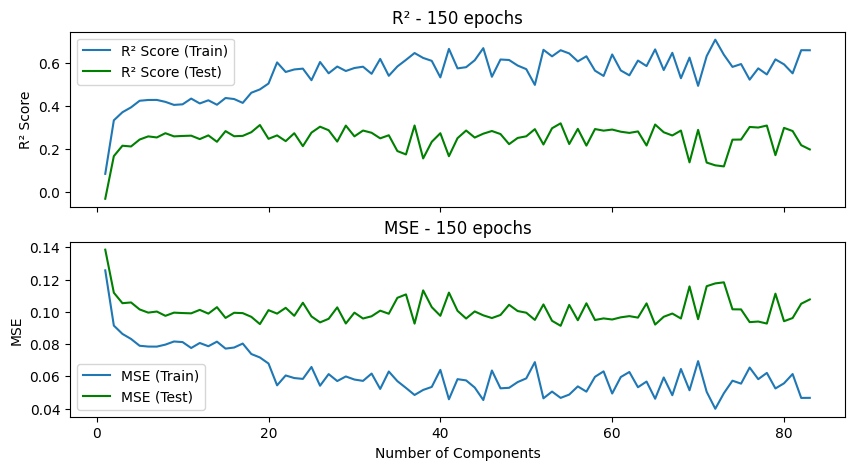

In [22]:
import matplotlib.pyplot as plt

plt.style.use('default')# plt.style.use('seaborn-v0_8-colorblind')
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

# For R2 Score
ax1.plot(components, r2_scores, label="R² Score (Train)")
ax1.plot(components, r2_array, label="R² Score (Test)", color='green')
ax1.set_ylabel("R² Score")
# ax1.fill_between(components, max_r2_list, min_r2_list, alpha = 0.2)
ax1.legend()
ax1.set_title("R² - 150 epochs")

# For MSE
ax2.plot(components, mse_scores, label="MSE (Train)")
ax2.plot(components, mse_array, label="MSE (Test)", color='green')
ax2.set_xlabel("Number of Components")
ax2.set_ylabel("MSE")
ax2.legend()
ax2.set_title("MSE - 150 epochs")
# ax2.fill_between(components, max_rmse_list, min_rmse_list, alpha = 0.2)


plt.show()


IndexError: index 70 is out of bounds for axis 0 with size 70

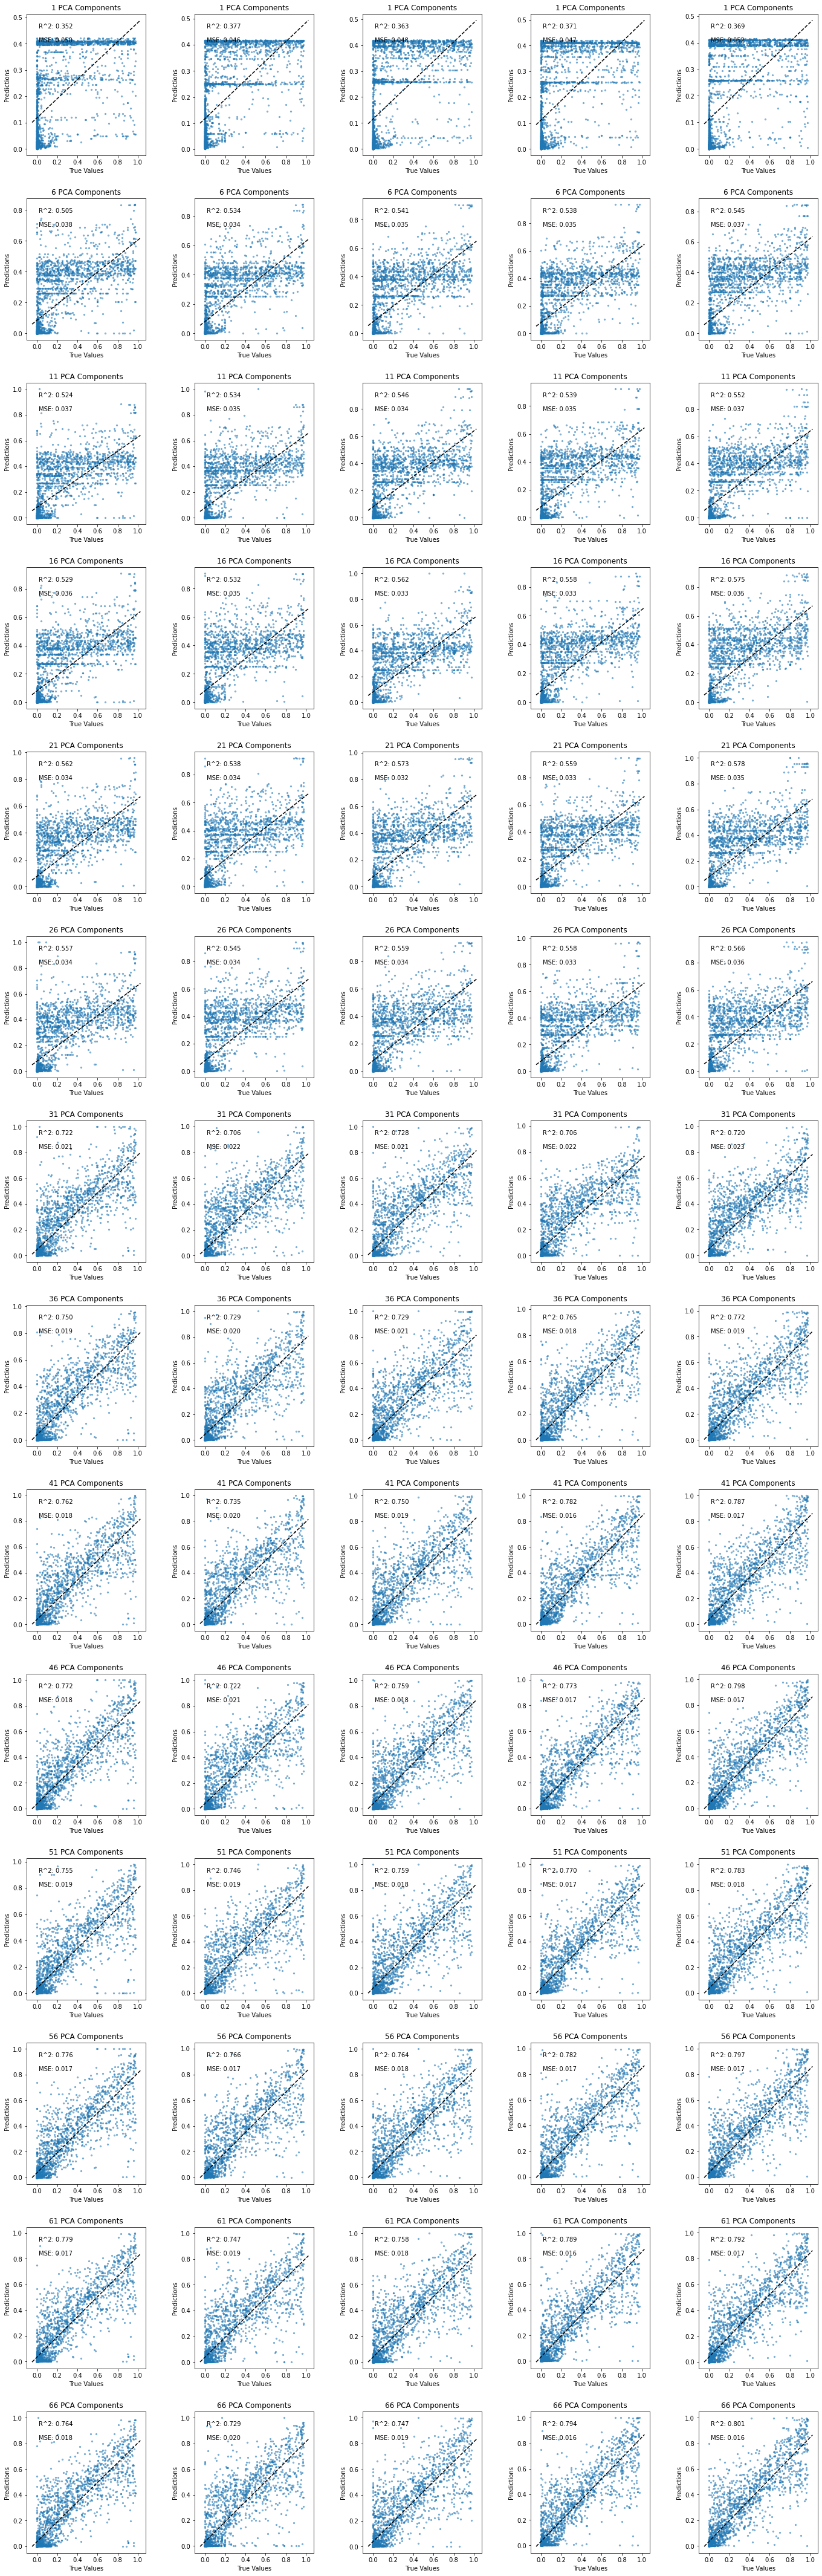

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

fig, axes = plt.subplots(14, 5, figsize=(20, 60))
fig.tight_layout(pad=5.0)
axes = axes.ravel()

for idx, (true_values, predicted_values) in enumerate(zip(true_values_all, predicted_values_all)):

    mse = mean_squared_error(true_values, predicted_values) # Compute MSE
    axes[idx].scatter(true_values, predicted_values, alpha=0.5, s=5)

    lin_reg = LinearRegression().fit(true_values.reshape(-1, 1), predicted_values)
    y_vals = np.array(axes[idx].get_xlim())
    x_vals = y_vals * lin_reg.coef_.squeeze() + lin_reg.intercept_
    axes[idx].plot(y_vals, x_vals, '--', color='black')

    r2 = lin_reg.score(true_values.reshape(-1, 1), predicted_values)
    axes[idx].text(0.1, 0.9, f'R^2: {r2:.3f}', transform=axes[idx].transAxes)
    axes[idx].text(0.1, 0.8, f'MSE: {mse:.3f}', transform=axes[idx].transAxes)

    n_components = components[idx // kf.get_n_splits()]  # idx // kf.get_n_splits() gives the PCA component number
    axes[idx].set_title(f'{n_components} PCA Components')
    axes[idx].set_xlabel('True Values')
    axes[idx].set_ylabel('Predictions')

plt.show()

In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Your Neural Network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

X_weighted_tensor_full = torch.tensor(X_weighted.values).float().to(device)
y_tensor = torch.tensor(y.values).float().to(device)

feature_names = list(X_weighted.columns)
feature_loss_dict = {}

num_epochs = 500

for i, feature in enumerate(tqdm(feature_names, desc="Evaluating feature importance")):
    # Remove the feature
    indices = list(range(X_weighted_tensor_full.shape[1]))
    indices.pop(i)
    X_weighted_tensor = X_weighted_tensor_full[:, indices]
    
    # Train the model
    model = NeuralNetwork(input_dim=X_weighted_tensor.shape[1]).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters())

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_weighted_tensor).squeeze()
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

    # Use the final loss as the importance of the feature
    # Higher loss means the feature is more important
    feature_loss_dict[feature] = loss.item()

# Rank features by their importance
sorted_features = sorted(feature_loss_dict.items(), key=lambda x: x[1], reverse=True)
ranked_df = pd.DataFrame({
    'Feature Name': [f[0] for f in sorted_features],
    'Rank': range(1, len(sorted_features) + 1),
    'Loss': [f[1] for f in sorted_features]
})

print(ranked_df)
ranked_df.to_csv("feature_rankings.csv", index=False)

Evaluating feature importance:   1%|          | 1/86 [00:08<11:45,  8.30s/it]


KeyboardInterrupt: 

In [2]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.decomposition import PCA
from tqdm import tqdm

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, dropout_prob=0.3):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64), 
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),       
        )

    def forward(self, x):
        return self.layers(x)

# Assuming X_weighted is your input data loaded from a DataFrame
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_weighted)

# Convert PCA-transformed data to PyTorch tensors and move to device
X_weighted_tensor = torch.tensor(X_pca).float().to(device)
y_tensor = torch.tensor(y.values).float().to(device)

# Initialize and train the model
model = NeuralNetwork(input_dim=50).to(device)  # input_dim changed to 60
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

num_epochs = 500
loss_values = [] 

# Use tqdm for progress bar
pbar = tqdm(range(num_epochs), desc="Training", position=0, leave=True)
for epoch in pbar:
    optimizer.zero_grad()
    outputs = model(X_weighted_tensor).squeeze()
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    # Append loss value
    if epoch % 1000 == 0:
        loss_values.append(loss.item())

    # Calculate R-squared
    ss_res = loss.item() * y_tensor.shape[0]  # because MSE is the mean of squared residuals
    ss_tot = torch.sum((y_tensor - y_tensor.mean()) ** 2).item()
    r2 = 1 - (ss_res / ss_tot)                                                        

    # Update tqdm description with current loss and R-squared
    pbar.set_postfix({"Loss": loss.item(), "R2": r2})


Training: 100%|██████████| 500/500 [00:05<00:00, 91.02it/s, Loss=2.68, R2=0.916] 


In [3]:
torch.save(model.state_dict(), "C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Results/SavedModels/20230815-162900-DNeuralNetwork-MTrainLm-494.pth")

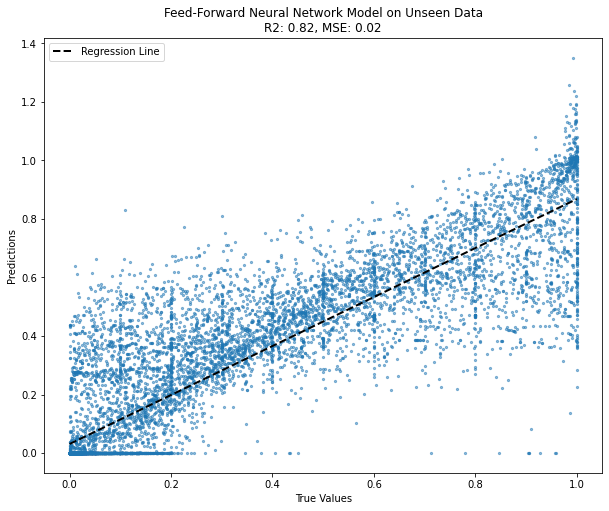

In [30]:
# Get model predictions after training
with torch.no_grad():
    predictions = model(X_weighted_tensor).squeeze().cpu().numpy()

# Fit a linear regression to the scatter plot
slope, intercept = np.polyfit(y_tensor.cpu().numpy(), predictions, 1)
mse = nn.MSELoss()(model(X_weighted_tensor).squeeze(), y_tensor).item()

np.savetxt("MTTLD_LinMF.txt", predictions.reshape(1, -1), delimiter=",", fmt="%s")

slope, intercept = np.polyfit(y_tensor.cpu().numpy(), predictions, 1)
x_vals = np.linspace(y_tensor.min().cpu().numpy(), y_tensor.max().cpu().numpy(), 100)
y_vals = slope * x_vals + intercept

plt.figure(figsize=(10, 8))
plt.scatter(y_tensor.cpu().numpy(), predictions, alpha=0.5, s=5)
plt.plot(x_vals, y_vals, '--k', lw=2, label='Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Feed-Forward Neural Network Model on Unseen Data\nR2: {r2:.2f}, MSE: {mse:.2f}')
plt.legend()
# plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


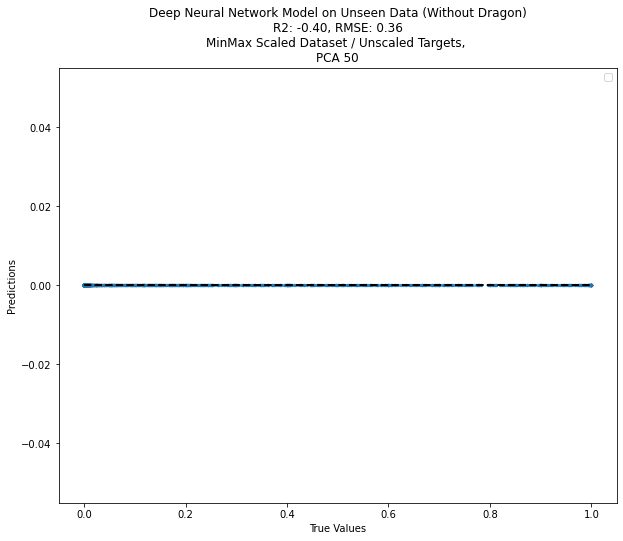

In [9]:
# Load your saved model
model = NeuralNetwork(input_dim=50).to(device)
model.load_state_dict(torch.load("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Results/SavedModels/20230815-162900-DNeuralNetwork-MTrainLm-494.pth"))
model.eval()  # Set the model to evaluation mode

test_dataset = pd.read_csv("C:/Users/dannt/Documents/GitHub/PSDI-miscibility2/Datasets/TrainTestData/ReducedFeatures/WithoutDragon/Test_LinearMF_RMM.csv")

X = test_dataset.iloc[:, 7:]

# Apply PCA transformation on test data
X_pca_test = pca.transform(X)
y = test_dataset['MoleFraction']

# Convert transformed test data to tensors
X_tensor = torch.tensor(X_pca_test).float().to(device)
y_tensor = torch.tensor(y.values).float().to(device)

with torch.no_grad():
    predictions = model(X_tensor).squeeze().cpu().numpy()

# Fit a linear regression to the scatter plot
slope, intercept = np.polyfit(y_tensor.cpu().numpy(), predictions, 1)
mse = nn.MSELoss()(model(X_tensor).squeeze(), y_tensor).item()

np.savetxt("TT_LinMF_RMM.txt", predictions.reshape(1, -1), delimiter=",", fmt="%s")

# Compute the residuals
residuals = predictions - y_tensor.cpu().numpy()

# Sum of squared residuals
SS_res = np.sum(residuals**2)
SS_tot = np.sum((y_tensor.cpu().numpy() - y_tensor.cpu().numpy().mean())**2)
r2 = 1 - (SS_res / SS_tot)

slope, intercept = np.polyfit(y_tensor.cpu().numpy(), predictions, 1)
x_vals = np.linspace(y_tensor.min().cpu().numpy(), y_tensor.max().cpu().numpy(), 100)
y_vals = slope * x_vals + intercept

plt.figure(figsize=(10, 8))
plt.scatter(y_tensor.cpu().numpy(), predictions, alpha=0.5, s=5)
plt.plot(x_vals, y_vals, '--k', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Deep Neural Network Model on Unseen Data (Without Dragon)\nR2: {r2:.2f}, RMSE: {np.sqrt(mse):.2f}\nMinMax Scaled Dataset / Unscaled Targets, \nPCA 50')
plt.legend()
# plt.grid(True)
plt.show()